In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.pyplot as plt

/kaggle/input/small-lcl-data/LCL-June2015v2_99.csv


In [2]:
d = pd.read_csv('/kaggle/input/small-lcl-data/LCL-June2015v2_99.csv', parse_dates=["DateTime"])

In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   LCLid                    1000000 non-null  object        
 1   stdorToU                 1000000 non-null  object        
 2   DateTime                 1000000 non-null  datetime64[ns]
 3   KWH/hh (per half hour)   1000000 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 30.5+ MB


In [4]:
# convert usage to floats
print(d.iloc[3])
d.iloc[:, 3] = pd.to_numeric(d.iloc[:, 3], errors='coerce')
# print(d.dtypes)

LCLid                                MAC004221
stdorToU                                   Std
DateTime                   2013-08-06 08:30:00
KWH/hh (per half hour)                  0.018 
Name: 3, dtype: object


/tmp/ipykernel_20/4036314771.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  d.iloc[:, 3] = pd.to_numeric(d.iloc[:, 3], errors='coerce')


In [5]:
from pandas_profiling import ProfileReport

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-o

In [6]:
report = ProfileReport(d)


In [7]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# visualize and handle duplicates

# visualize and handle outliers


In [9]:
# extract one smartmeter for plotting
sample = d.query("LCLid == 'MAC004262'")
sample

LCLid stdorToU            DateTime  KWH/hh (per half hour) 
857057  MAC004262      Std 2012-05-24 09:00:00                    0.506
857058  MAC004262      Std 2012-05-24 09:30:00                    0.261
857059  MAC004262      Std 2012-05-24 10:00:00                    0.123
857060  MAC004262      Std 2012-05-24 10:30:00                    0.095
857061  MAC004262      Std 2012-05-24 11:00:00                    0.188
...           ...      ...                 ...                      ...
888015  MAC004262      Std 2014-02-27 22:30:00                    0.308
888016  MAC004262      Std 2014-02-27 23:00:00                    0.231
888017  MAC004262      Std 2014-02-27 23:30:00                    0.140
888018  MAC004262      Std 2014-02-28 00:00:00                    0.097
888019  MAC004262      Std 2014-02-28 00:00:00                    0.097

[30963 rows x 4 columns]

In [10]:
sample.iloc[:,3]
sample.iloc[:,2]

857057   2012-05-24 09:00:00
857058   2012-05-24 09:30:00
857059   2012-05-24 10:00:00
857060   2012-05-24 10:30:00
857061   2012-05-24 11:00:00
                 ...        
888015   2014-02-27 22:30:00
888016   2014-02-27 23:00:00
888017   2014-02-27 23:30:00
888018   2014-02-28 00:00:00
888019   2014-02-28 00:00:00
Name: DateTime, Length: 30963, dtype: datetime64[ns]

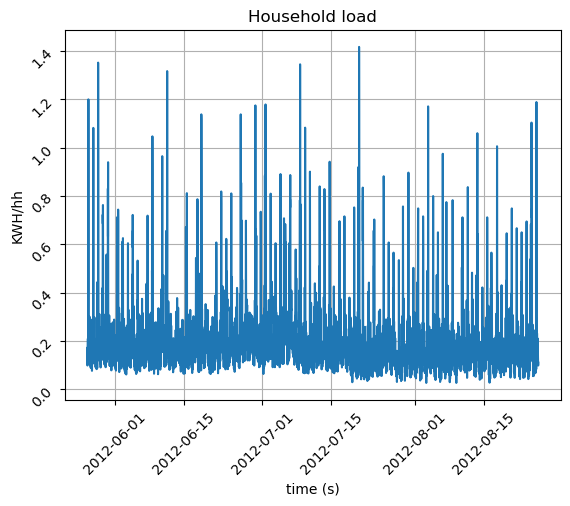

In [11]:
fig, ax = plt.subplots()
ax.plot(sample.iloc[100:4500,2], sample.iloc[100:4500,3])

ax.set(xlabel='time (s)', ylabel='KWH/hh',
       title='Household load')
plt.tick_params(rotation=45)
ax.grid()

fig.savefig("test.png")
plt.show()

In [12]:
# calculate sum of all loads
aggLoad = pd.DataFrame(columns=['DateTime', 'AggregateLoad'])
limit = 100
counter = 1
for tstamp in d.DateTime.unique():
    # print('tstamp: ', tstamp)
    tstampSum = d.loc[d['DateTime'] == tstamp].iloc[:,3].sum()
    row = {
    "DateTime": tstamp,
    "AggregateLoad": tstampSum
    }
    # print(row)
    aggLoad = aggLoad.append(row, ignore_index=True)
    counter += 1
    # if counter >= limit:
    #    break
    
aggLoad

/tmp/ipykernel_20/2560133636.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aggLoad = aggLoad.append(row, ignore_index=True)
/tmp/ipykernel_20/2560133636.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aggLoad = aggLoad.append(row, ignore_index=True)
/tmp/ipykernel_20/2560133636.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aggLoad = aggLoad.append(row, ignore_index=True)
/tmp/ipykernel_20/2560133636.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aggLoad = aggLoad.append(row, ignore_index=True)
/tmp/ipykernel_20/2560133636.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas

DateTime  AggregateLoad
0     2013-08-06 07:00:00          4.172
1     2013-08-06 07:30:00          4.793
2     2013-08-06 08:00:00          6.773
3     2013-08-06 08:30:00          5.659
4     2013-08-06 09:00:00          5.272
...                   ...            ...
30990 2012-12-18 15:20:01          0.000
30991 2012-12-18 15:20:02          0.000
30992 2013-02-06 18:22:38          0.000
30993 2012-12-18 15:20:03          0.000
30994 2012-12-18 15:20:04          0.000

[30995 rows x 2 columns]

In [13]:
aggLoad

DateTime  AggregateLoad
0     2013-08-06 07:00:00          4.172
1     2013-08-06 07:30:00          4.793
2     2013-08-06 08:00:00          6.773
3     2013-08-06 08:30:00          5.659
4     2013-08-06 09:00:00          5.272
...                   ...            ...
30990 2012-12-18 15:20:01          0.000
30991 2012-12-18 15:20:02          0.000
30992 2013-02-06 18:22:38          0.000
30993 2012-12-18 15:20:03          0.000
30994 2012-12-18 15:20:04          0.000

[30995 rows x 2 columns]

In [14]:
aggLoad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30995 entries, 0 to 30994
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       30995 non-null  datetime64[ns]
 1   AggregateLoad  30995 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 484.4 KB


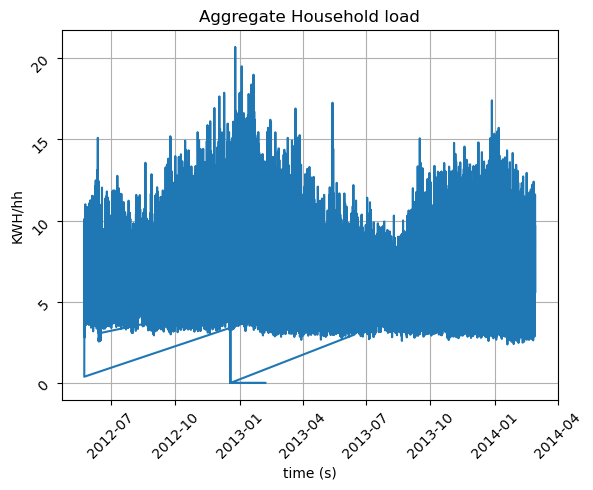

In [15]:
fig, ax = plt.subplots()
ax.plot(aggLoad.iloc[:,0], aggLoad.iloc[:,1])

ax.set(xlabel='time (s)', ylabel='KWH/hh',
       title='Aggregate Household load')
plt.tick_params(rotation=45)
ax.grid()

fig.savefig("test.png")
plt.show()

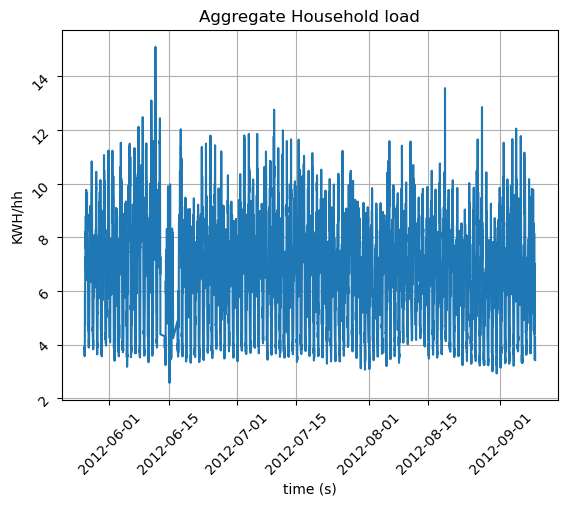

In [16]:
fig, ax = plt.subplots()
ax.plot(aggLoad.iloc[10000:15000,0], aggLoad.iloc[10000:15000,1])

ax.set(xlabel='time (s)', ylabel='KWH/hh',
       title='Aggregate Household load')
plt.tick_params(rotation=45)
ax.grid()

fig.savefig("test.png")
plt.show()

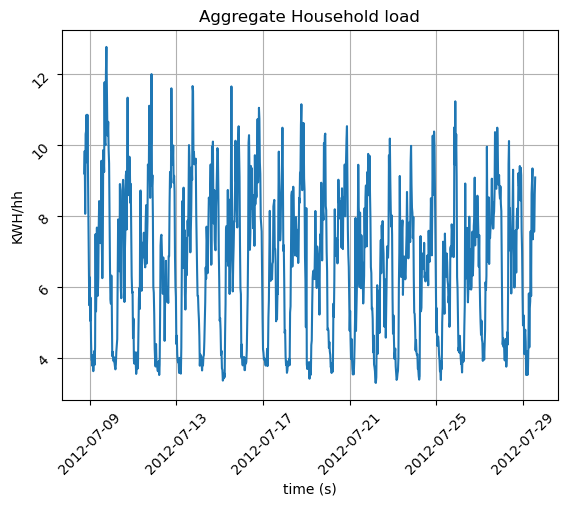

In [17]:
fig, ax = plt.subplots()
ax.plot(aggLoad.iloc[12000:13000,0], aggLoad.iloc[12000:13000,1])

ax.set(xlabel='time (s)', ylabel='KWH/hh',
       title='Aggregate Household load')
plt.tick_params(rotation=45)
ax.grid()

fig.savefig("test.png")
plt.show()

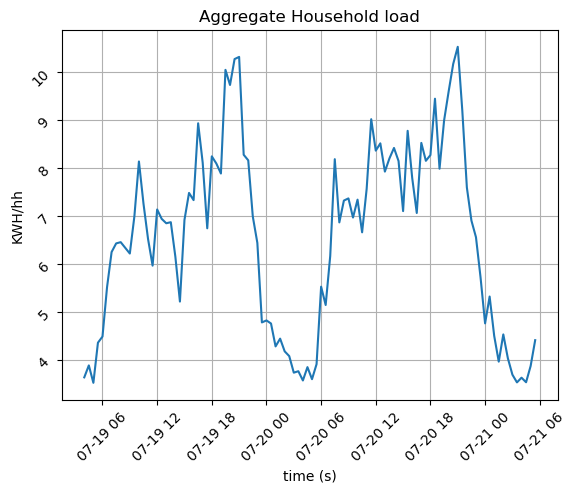

In [18]:
fig, ax = plt.subplots()
ax.plot(aggLoad.iloc[12500:12600,0], aggLoad.iloc[12500:12600,1])

ax.set(xlabel='time (s)', ylabel='KWH/hh',
       title='Aggregate Household load')
plt.tick_params(rotation=45)
ax.grid()

fig.savefig("test.png")
plt.show()

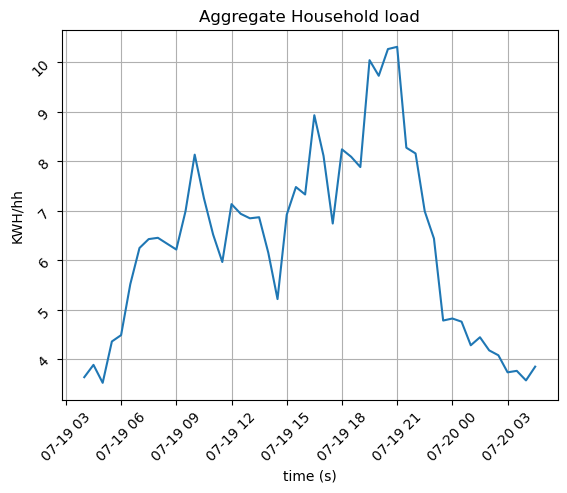

In [19]:
fig, ax = plt.subplots()
ax.plot(aggLoad.iloc[12500:12550,0], aggLoad.iloc[12500:12550,1])

ax.set(xlabel='time (s)', ylabel='KWH/hh',
       title='Aggregate Household load')
plt.tick_params(rotation=45)
ax.grid()

fig.savefig("test.png")
plt.show()

In [20]:
!pip install pyreadr
import pyreadr as pyr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.8/434.8 kB 10.8 MB/s eta 0:00:00
